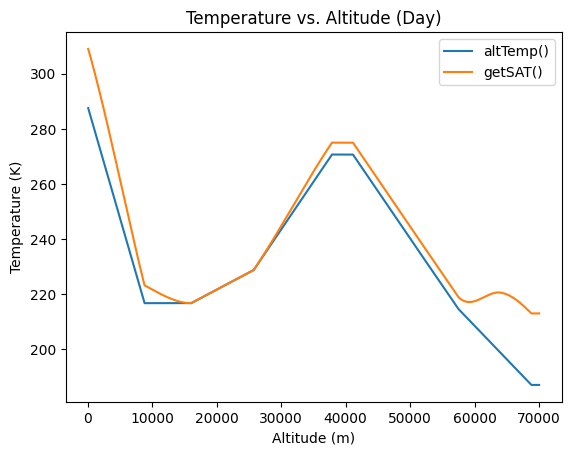

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Get data
day = pd.read_csv('temp_day.log')
alts_day = day['alt'].values
altTemps_day = day['altTemp()'].values
getSATs_day = day['getSAT()'].values

# Plot data
fig, ax = plt.subplots()
ax.plot(alts_day, altTemps_day, label='altTemp()')
ax.plot(alts_day, getSATs_day, label='getSAT()')
ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Temperature (K)')
ax.set_title('Temperature vs. Altitude (Day)')
ax.legend()

plt.show()

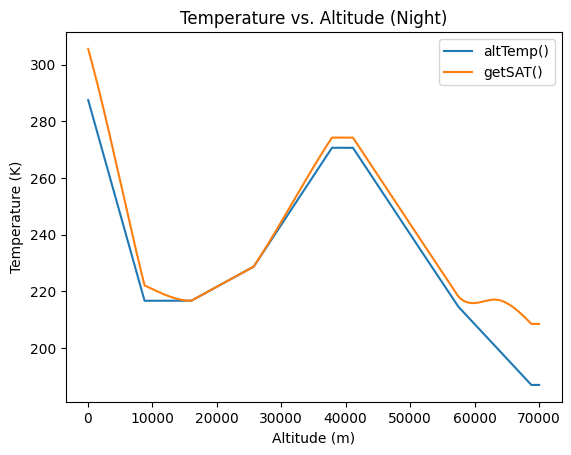

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Get data
day = pd.read_csv('temp_night.log')
alts_day = day['alt'].values
altTemps_day = day['altTemp()'].values
getSATs_day = day['getSAT()'].values

# Plot data
fig, ax = plt.subplots()
ax.plot(alts_day, altTemps_day, label='altTemp()')
ax.plot(alts_day, getSATs_day, label='getSAT()')
ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Temperature (K)')
ax.set_title('Temperature vs. Altitude (Night)')
ax.legend()

plt.show()

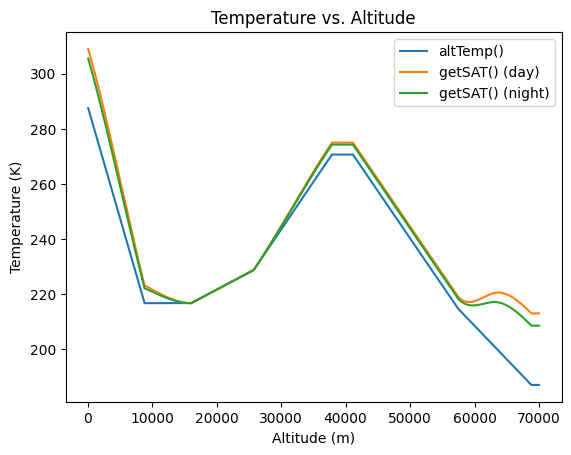

In [3]:
# Plot the different method's values for altitudes. The SAT day/night values are
# displayed along with the average of the two.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data
day = pd.read_csv("temp_day.log")
alts_day = day["alt"].values
altTemps_day = day["altTemp()"].values
getSATs_day = day["getSAT()"].values

night = pd.read_csv("temp_night.log")
alts_night = night["alt"].values
altTemps_night = night["altTemp()"].values
getSATs_night = night["getSAT()"].values

# Get average (thanks ChatGPT)
x1, y1 = alts_day, getSATs_day
x2, y2 = alts_night, getSATs_night
# Identify common range
common_range_avg = np.arange(max(min(x1), min(x2)), min(max(x1), max(x2)) + 1)
# Interpolate data onto common range
y1_interpolated = np.interp(common_range_avg, x1, y1)
y2_interpolated = np.interp(common_range_avg, x2, y2)
# Compute the average
getSATs_average = (y1_interpolated + y2_interpolated) / 2

# Plot data
fig, ax = plt.subplots()
ax.set_xlabel("Altitude (m)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Temperature vs. Altitude")

ax.plot(alts_day, altTemps_day, label="altTemp()")
ax.plot(alts_day, getSATs_day, label="getSAT() (day)")
ax.plot(alts_night, getSATs_night, label="getSAT() (night)")
# ax.plot(common_range_avg, getSATs_average, label='getSAT() (average)')
ax.legend()

plt.show()

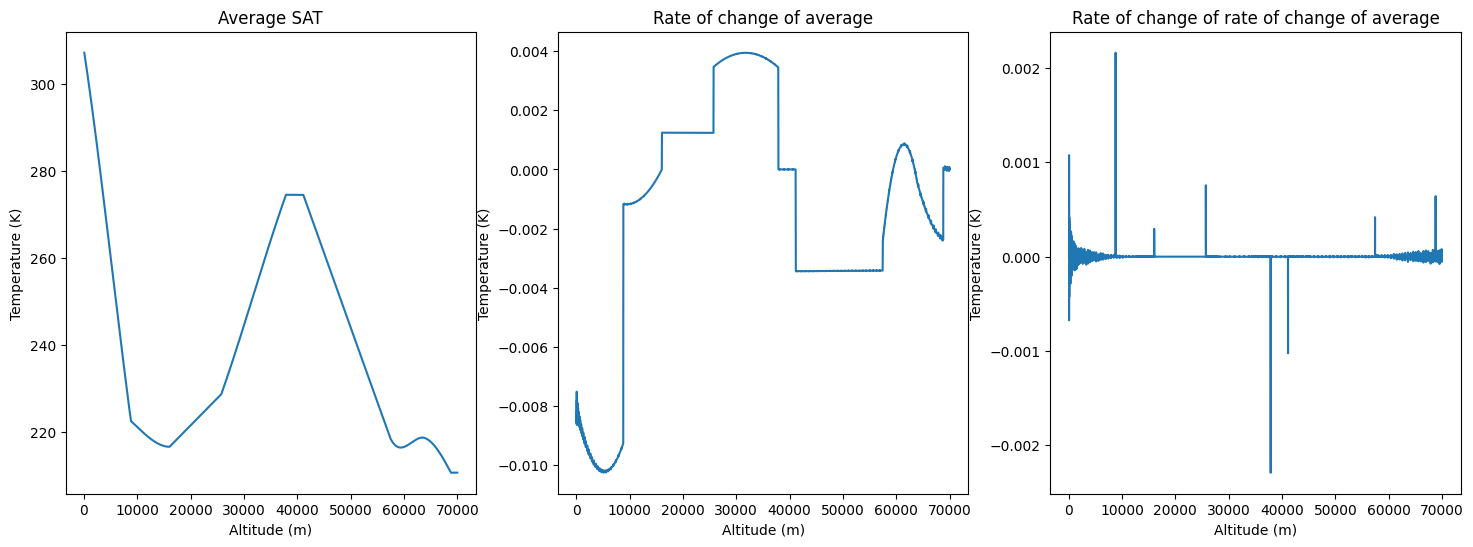

In [25]:
# Plot the different method's values for altitudes. The SAT day/night values are
# displayed along with the average of the two.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data
day = pd.read_csv('temp_day.log')
alts_day = day['alt'].values
altTemps_day = day['altTemp()'].values
getSATs_day = day['getSAT()'].values

night = pd.read_csv('temp_night.log')
alts_night = night['alt'].values
altTemps_night = night['altTemp()'].values
getSATs_night = night['getSAT()'].values

# Get average (thanks ChatGPT)
x1, y1 = alts_day, getSATs_day
x2, y2 = alts_night, getSATs_night
# Identify common range
common_range_avg = np.arange(max(min(x1), min(x2)), min(max(x1), max(x2)) + 1)
# Interpolate data onto common range
y1_interpolated = np.interp(common_range_avg, x1, y1)
y2_interpolated = np.interp(common_range_avg, x2, y2)
# Compute the average
getSATs_average = (y1_interpolated + y2_interpolated) / 2

# Get rate of change of average
rate_of_change = [getSATs_average[i+1] - getSATs_average[i] for i in range(len(getSATs_average)-1)]

# Get rate of change of rate of change of average
rate_of_change_of_rate_of_change = [rate_of_change[i+1] - rate_of_change[i] for i in range(len(rate_of_change)-1)]

# Plot data
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Altitude (m)')
ax1.set_ylabel('Temperature (K)')
ax1.set_title('Average SAT')
ax2.set_xlabel('Altitude (m)')
ax2.set_ylabel('Temperature (K)')
ax2.set_title('Rate of change of average')
ax3.set_xlabel('Altitude (m)')
ax3.set_ylabel('Temperature (K)')
ax3.set_title('Rate of change of rate of change of average')

ax1.plot(common_range_avg, getSATs_average, label='getSAT() (average)')
ax2.plot(common_range_avg[:-1], rate_of_change, label='Rate of change of average')
ax3.plot(common_range_avg[:-2], rate_of_change_of_rate_of_change, label='Rate of change of rate of change of average')

plt.show()

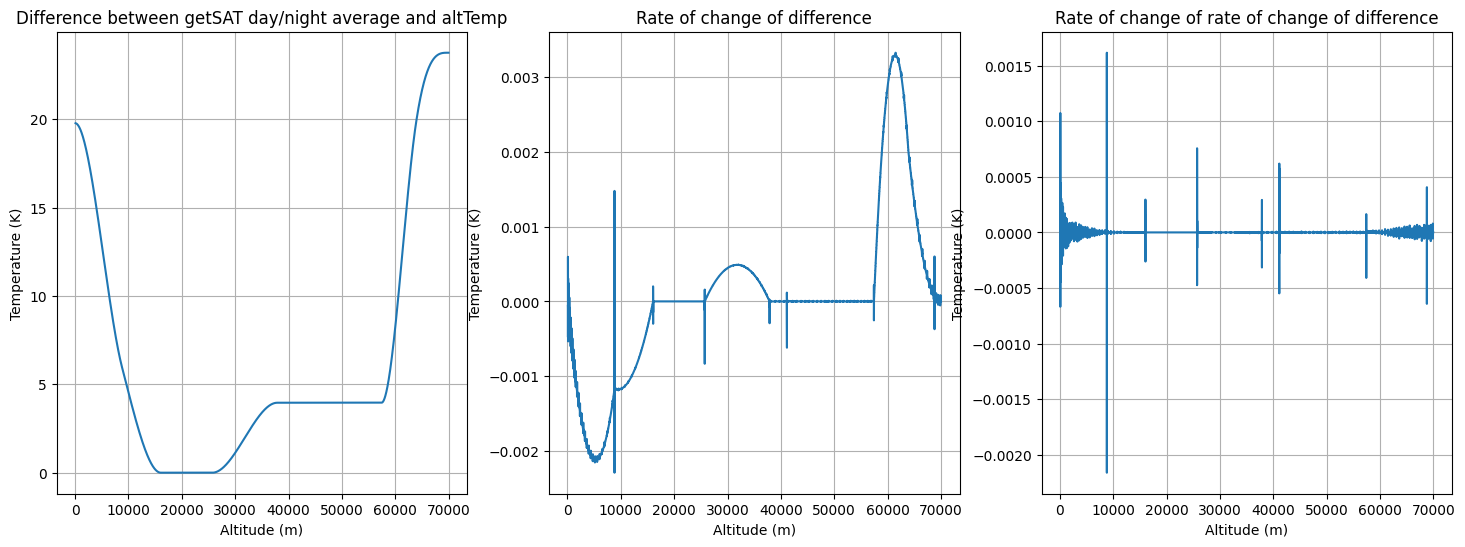

In [21]:
# Plot the difference between the average of getSAT day and night and altTemp.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get data
day = pd.read_csv("temp_day.log")
alts_day = day["alt"].values
altTemps_day = day["altTemp()"].values
getSATs_day = day["getSAT()"].values

night = pd.read_csv("temp_night.log")
alts_night = night["alt"].values
getSATs_night = night["getSAT()"].values

# Get average (thanks ChatGPT)
x1, y1 = alts_day, getSATs_day
x2, y2 = alts_night, getSATs_night
# Identify common range
common_range_avg = np.arange(max(min(x1), min(x2)), min(max(x1), max(x2)) + 1)
# Interpolate data onto common range
y1_interpolated = np.interp(common_range_avg, x1, y1)
y2_interpolated = np.interp(common_range_avg, x2, y2)
# Compute the average
getSATs_average = (y1_interpolated + y2_interpolated) / 2

# Get difference (thanks ChatGPT)
x1, y1 = common_range_avg, getSATs_average
x2, y2 = alts_day, altTemps_day
# Identify common range
common_range_diff = np.arange(max(min(x1), min(x2)), min(max(x1), max(x2)) + 1)
# Interpolate data onto common range
y1_interpolated = np.interp(common_range_avg, x1, y1)
y2_interpolated = np.interp(common_range_avg, x2, y2)
# Compute the difference
difference = y1_interpolated - y2_interpolated

# Determine rate of change of difference
rate_of_change = [difference[i+1] - difference[i] for i in range(len(difference)-1)]

# Determine rate of change of rate of change of difference
rate_of_change_of_rate_of_change = [rate_of_change[i+1] - rate_of_change[i] for i in range(len(rate_of_change)-1)]

# Plot data
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(18, 6))
ax1.plot(common_range_diff, difference, label="Difference")
ax1.set_title('Difference between getSAT day/night average and altTemp')
ax1.set_xlabel('Altitude (m)')
ax1.set_ylabel('Temperature (K)')
ax1.grid()
ax2.plot(common_range_diff[:-1], rate_of_change, label="Rate of change")
ax2.set_title('Rate of change of difference')
ax2.set_xlabel('Altitude (m)')
ax2.set_ylabel('Temperature (K)')
ax2.grid()
ax3.plot(common_range_diff[:-2], rate_of_change_of_rate_of_change, label="Rate of change of rate of change")
ax3.set_title('Rate of change of rate of change of difference')
ax3.set_xlabel('Altitude (m)')
ax3.set_ylabel('Temperature (K)')
ax3.grid()

plt.show()

[0, 8814]: 309.6642 + -8.1137e-03 * x**1 + -4.3756e-07 * x**2 + 2.7706e-11 * x**3
[8814, 16048]: 243.8136 + -3.0887e-03 * x**1 + 8.6216e-08 * x**2
[16048, 25735]: 196.7535 + 1.2399e-03 * x**1
[25735, 37877]: 279.1508 + -1.0577e-02 * x**1 + 4.5867e-07 * x**2 + -4.8140e-12 * x**3
[37877, 41120]: 274.9698
[41120, 57439]: 416.1255 + -3.4328e-03 * x**1
[57439, 61412]: 17697.6256 + -8.5603e-01 * x**1 + 1.3956e-05 * x**2 + -7.5739e-11 * x**3
[61412, 63440]: 17695.7926 + -8.5596e-01 * x**1 + 1.3955e-05 * x**2 + -7.5735e-11 * x**3
[63440, 68792]: -6884.9892 + 3.1011e-01 * x**1 + -4.4821e-06 * x**2 + 2.1427e-11 * x**3
[68792, 70000]: 212.9276


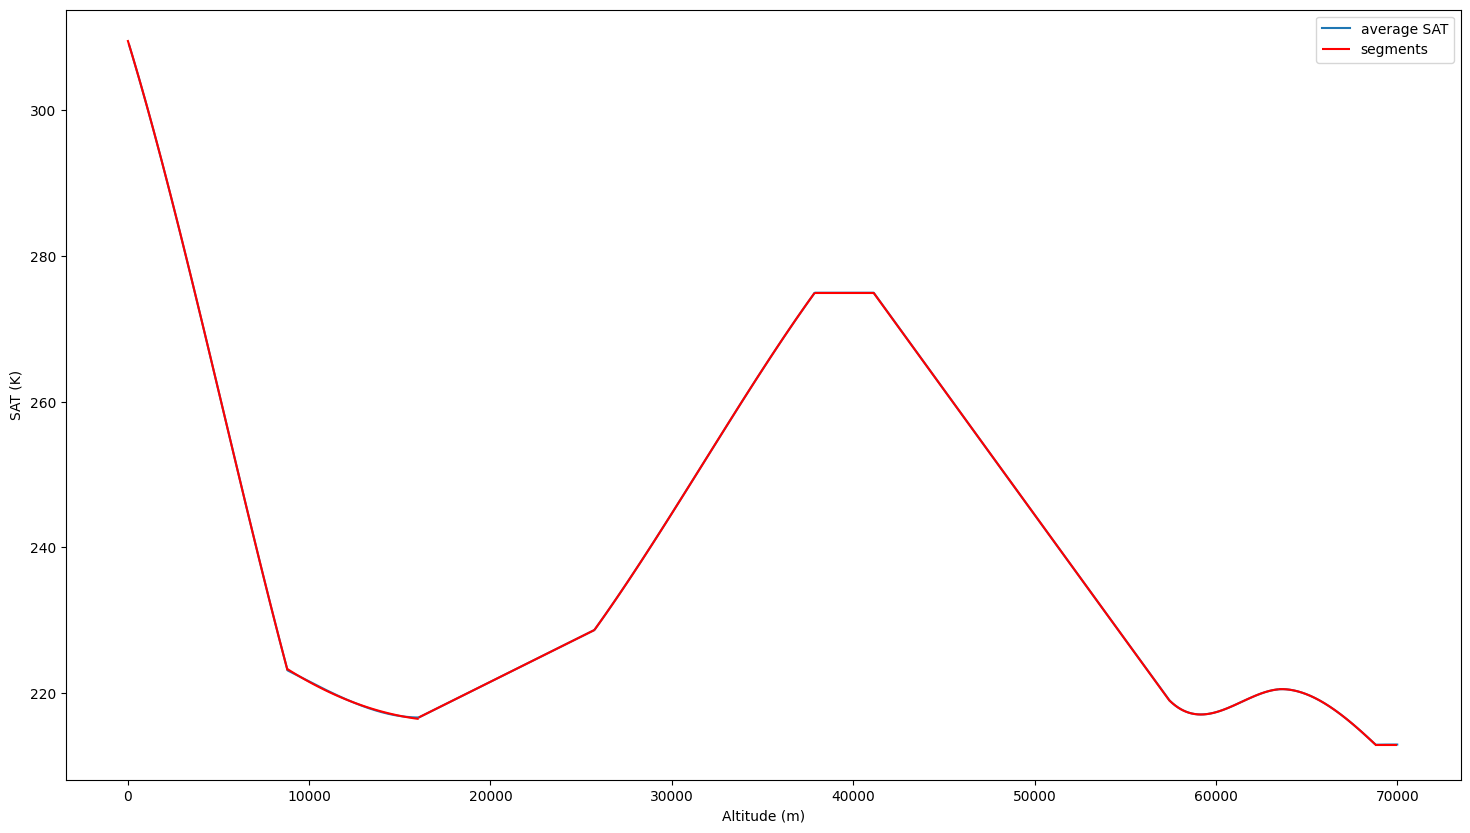

In [2]:
# Fits a number of curves to the getSAT day/night average, based on set breakpoints.

from matplotlib.collections import LineCollection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get data
day = pd.read_csv("temp_day.log")
alts_day = day["alt"].values
altTemps_day = day["altTemp()"].values
getSATs_day = day["getSAT()"].values

x = alts_day
y = getSATs_day

# Define estimated breakpoints
breakpoints = [0, 8814, 16048, 25735, 37877, 41120, 57439, 61412, 63440, 68792, 70000]
degrees = [3, 2, 1, 3, 0, 1, 3, 3, 3, 0]

# Segmented curve fitting

from scipy.optimize import curve_fit


def segment_curve(x, *params):
    return np.polyval(params, x)


# Loop through segments and fit curves
segments = []
for i in range(len(breakpoints) - 1):
    start_idx = np.searchsorted(x, breakpoints[i])
    end_idx = np.searchsorted(x, breakpoints[i + 1])

    segment_x = x[start_idx:end_idx]
    segment_y = y[start_idx:end_idx]

    # Fit a polynomial curve of the desired degree
    degree = degrees[i]
    popt, _ = curve_fit(segment_curve, segment_x, segment_y, p0=np.zeros(degree + 1))

    segments.append(
        {
            "start": breakpoints[i],
            "end": breakpoints[i + 1],
            "degree": degree,
            "params": popt,
        }
    )

# Print segment equations
for segment in segments:
    segment_equation = f'{segment["params"][-1]:.4f}'
    for i, coef in enumerate(reversed(segment["params"][:-1])):
        segment_equation += f" + {coef:.4e} * x**{i+1}"
    print(f'[{segment["start"]}, {segment["end"]}]: {segment_equation}')

# Visualize the fit

fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(x, y, label="average SAT")

segment_lines = []
for segment in segments:
    segment_x = np.linspace(segment["start"], segment["end"], 100)
    segment_y = segment_curve(segment_x, *segment["params"])
    segment_lines.append(np.column_stack((segment_x, segment_y)))
ax.add_collection(LineCollection(segment_lines, colors="r", label="segments"))

plt.xlabel("Altitude (m)")
plt.ylabel("SAT (K)")
plt.legend()

plt.show()